In [1]:
import numpy as np
import pandas as pd
import sklearn


from sklearn.decomposition import PCA

In [2]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Flatten, Dot
from tensorflow.keras.optimizers import Adam

# Reading our Data

In [3]:
data_ratings = pd.read_excel("Data/ydata-ymusic-user-artist-ratings-v1_0/ydata-ymusic-user-artist-ratings-v1_0.xlsx")

In [4]:
data_ratings

,anonymous_user_id,artist_id,rating
0,1,1000125,90
1,1,1006373,100
2,1,1006978,90
3,1,1007035,100
4,1,1007098,100
...,...,...,...
60709,1000,1045525,90
60710,1000,1045696,90
60711,1000,1053507,90
60712,1000,1093012,50


In [5]:
df_spot = pd.read_csv("Data/spotify_millsongdata.csv")
df_yahoo = pd.read_excel("Data/ydata_ymusic_artist_names_v1_0/ydata_ymusic_artist_names_v1_0.xlsx"  , names=["artist_id", "artist_name"])

In [7]:
#df_spot , df_yahoo

In [6]:
df_spot['artist']=df_spot['artist'].astype(str)
df_yahoo['artist_name']=df_yahoo['artist_name'].astype(str)

### Importing the right libraries for Tokenizing the artist names

In [8]:
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

In [9]:
stemmer = PorterStemmer()

def token(txt):
    token = nltk.word_tokenize(txt)
    a = [stemmer.stem(word) for word in token]
    return " ".join(a)

In [10]:
df_spot['artist'] = df_spot['artist'].apply(lambda x: token(x))
df_yahoo['artist_name'] = df_yahoo['artist_name'].apply(lambda x: token(x))

In [11]:
final_yahoo_df = df_yahoo.loc[df_yahoo['artist_name'].isin(df_spot['artist'])]
final_spot_df = df_spot.loc[df_spot['artist'].isin(df_yahoo['artist_name'])]

In [12]:
#final_yahoo_df , final_spot_df

In [13]:
final_data = pd.DataFrame()

final_data = data_ratings.loc[data_ratings.artist_id.isin(final_yahoo_df['artist_id'])]

final_data = final_data.reset_index(drop=True)

In [14]:
final_data

,anonymous_user_id,artist_id,rating
0,1,1007098,100
1,1,1008659,100
2,1,1012809,70
3,1,1014635,100
4,1,1016419,100
...,...,...,...
16628,999,1098798,90
16629,1000,1025005,100
16630,1000,1037731,100
16631,1000,1045696,90


Now lets see what our final array artists

In [15]:
final_data.groupby(['artist_id'])['anonymous_user_id'].agg('count')

artist_id
1000286     48
1000353      5
1000412     19
1000454    199
1000529     11
          ... 
1099374      3
1099406      1
1099452      1
1099534     38
1100023      1
Name: anonymous_user_id, Length: 428, dtype: int64

# Implementing a Neural Network for predicting artist values

First step in our procedure , would be to keep our unique artist id's as an encoding named as artist_id2 , due to the nature of our simple neural network . 

## Encoding our artist's id , due to being our input on our neural network .
The artist's id counts as a value (e.g. 1092837 = 1.092.837) and by encoding it we are essentially transported from an 8 digit decimal number to an 5 digit decimal number 

In [18]:
dummy = []
for i in range(428):
    dummy_1 = i
    
    dummy.append(dummy_1)

In [19]:
santas_helper = final_data.copy()

In [20]:
santas_helper['artist_id2'] = santas_helper['artist_id']

In [21]:
un_val = santas_helper.artist_id2.unique()

In [22]:
un_val

array([1007098, 1008659, 1012809, 1014635, 1016419, 1016885, 1017874,
       1019512, 1019522, 1020778, 1024759, 1029612, 1034801, 1037847,
       1053507, 1098798, 1002815, 1009352, 1011846, 1014252, 1021815,
       1021912, 1022226, 1026581, 1042272, 1082975, 1010787, 1013025,
       1014120, 1015750, 1020326, 1021580, 1025005, 1029489, 1034883,
       1046331, 1097498, 1006078, 1008023, 1019576, 1021142, 1021928,
       1025831, 1026015, 1032224, 1053653, 1027978, 1002217, 1003408,
       1005409, 1007748, 1009158, 1012152, 1013119, 1013589, 1016600,
       1021515, 1022257, 1022288, 1023041, 1023111, 1029227, 1030366,
       1000286, 1000454, 1000905, 1001236, 1004976, 1005017, 1005290,
       1005605, 1005938, 1006971, 1007340, 1008492, 1009214, 1009400,
       1010317, 1011104, 1012012, 1012651, 1012752, 1012884, 1013438,
       1014463, 1014692, 1015715, 1017031, 1017511, 1018620, 1019331,
       1019802, 1022601, 1023509, 1025681, 1025801, 1025892, 1026620,
       1027798, 1028

Now we let the magic happen and place our encoded artist

In [23]:
i = 0
for i in range(len(dummy)):
    value = un_val[i]
    val_dum = dummy[i]
    
    santas_helper['artist_id2'] =santas_helper['artist_id2'].replace({value: val_dum})

In [24]:
santas_helper.groupby(['artist_id2'])['anonymous_user_id'].agg('count')

artist_id2
0      132
1       32
2       36
3      182
4      111
      ... 
423      1
424      1
425      1
426      1
427      1
Name: anonymous_user_id, Length: 428, dtype: int64

In [25]:
df = santas_helper.copy()

In [26]:
df.artist_id

0        1007098
1        1008659
2        1012809
3        1014635
4        1016419
          ...   
16628    1098798
16629    1025005
16630    1037731
16631    1045696
16632    1053507
Name: artist_id, Length: 16633, dtype: int64

In [27]:
df

,anonymous_user_id,artist_id,rating,artist_id2
0,1,1007098,100,0
1,1,1008659,100,1
2,1,1012809,70,2
3,1,1014635,100,3
4,1,1016419,100,4
...,...,...,...,...
16628,999,1098798,90,15
16629,1000,1025005,100,32
16630,1000,1037731,100,135
16631,1000,1045696,90,104


## Now it is time to scale our values accordingly in order to have a better result at our neural network

In [29]:
from sklearn.preprocessing import MinMaxScaler

In [30]:
scaler = MinMaxScaler()

In [31]:
val_ues = df['rating'].values

In [32]:
len(val_ues)

16633

In [33]:
help2 = scaler.fit(val_ues.reshape(-1,1))

In [34]:
help2 = scaler.transform(val_ues.reshape(-1,1))

In [35]:
help2 = pd.DataFrame(help2)

Now lets check our scaled values

In [39]:
help2

,0
0,0.392157
1,0.392157
2,0.274510
3,0.392157
4,0.392157
...,...
16628,0.352941
16629,0.392157
16630,0.392157
16631,0.352941


In [40]:
df['sc_rat'] = help2

In [41]:
df

,anonymous_user_id,artist_id,rating,artist_id2,sc_rat
0,1,1007098,100,0,0.392157
1,1,1008659,100,1,0.392157
2,1,1012809,70,2,0.274510
3,1,1014635,100,3,0.392157
4,1,1016419,100,4,0.392157
...,...,...,...,...,...
16628,999,1098798,90,15,0.352941
16629,1000,1025005,100,32,0.392157
16630,1000,1037731,100,135,0.392157
16631,1000,1045696,90,104,0.352941


## Building our Neural Networks model , using keras

In [42]:
n_users = len(data_ratings.anonymous_user_id.unique())
n_artists = len(data_ratings.artist_id.unique())

In [43]:
print(n_users , n_artists) # cheking if the process is correct

1000 6314


For our optimizer we have chosen AdamW , with momentum

In [54]:
opt = tensorflow.keras.optimizers.AdamW(learning_rate =0.007 , beta_1=0.9,
    beta_2=0.999,
    use_ema=True,
    ema_momentum=0.99,)

In [55]:
artist_input = Input(shape=[1], name="Artist-Input")
artist_embedding = Embedding(n_artists+1, 5, name="Artist-Embedding")(artist_input)
artist_vec = Flatten(name="Flatten-Artists")(artist_embedding)

user_input = Input(shape=[1], name="User-Input")
user_embedding = Embedding(n_users+1, 5, name="User-Embedding")(user_input)
user_vec = Flatten(name="Flatten-Users")(user_embedding)

prod = Dot(name="Dot-Product", axes=1)([artist_vec, user_vec])
model = Model([user_input, artist_input], prod)
model.compile(optimizer = opt , 
              loss = 'mean_squared_error' ,
              metrics=[tensorflow.keras.metrics.BinaryAccuracy(name='accuracy'),
                       tensorflow.keras.metrics.Precision(name='precision'),
                       tensorflow.keras.metrics.Recall(name='recall')])

In [56]:
import os

Training our model

Epoch 1/5
520/520 [==============================] - 2s 2ms/step - loss: 0.0384 - accuracy: 0.2185 - precision: 0.8889 - recall: 6.1548e-04
Epoch 2/5
520/520 [==============================] - 1s 2ms/step - loss: 0.0138 - accuracy: 0.2185 - precision: 1.0000 - recall: 7.6935e-04
Epoch 3/5
520/520 [==============================] - 1s 2ms/step - loss: 0.0118 - accuracy: 0.2186 - precision: 1.0000 - recall: 0.0013
Epoch 4/5
520/520 [==============================] - 1s 2ms/step - loss: 0.0107 - accuracy: 0.2187 - precision: 1.0000 - recall: 0.0023
Epoch 5/5
520/520 [==============================] - 1s 2ms/step - loss: 0.0104 - accuracy: 0.2188 - precision: 1.0000 - recall: 0.0032


Text(0, 0.5, 'Training Error')

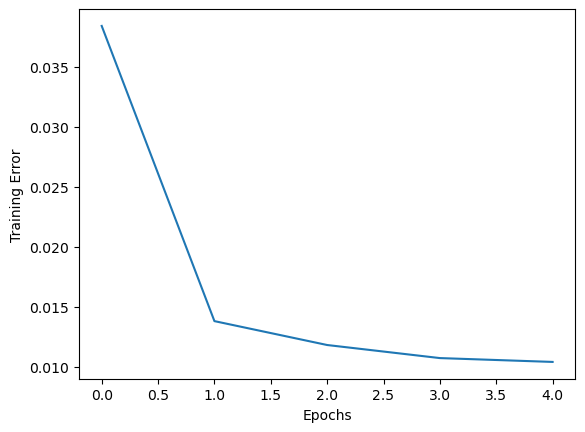

In [57]:
if os.path.exists('regression_model.h5'):
    model = load_model('nn_adamw.h5')
else:
    history = model.fit([df.anonymous_user_id , df.artist_id2], df.sc_rat, epochs=5, verbose=1)
    model.save('nn_adamw.h5')


plt.plot(history.history['loss'])
plt.xlabel("Epochs")
plt.ylabel("Training Error")

Now lets check its accuracy 

Text(0, 0.5, 'Accuracy')

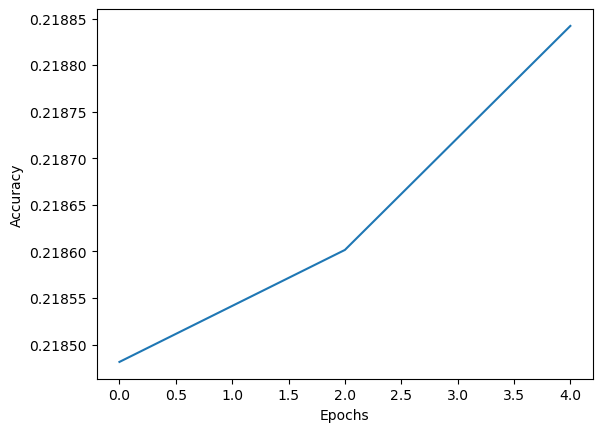

In [58]:
plt.plot(history.history['accuracy'])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

As it turns out , it isnt the best model , but due to its simplicity , its ok

In [59]:
# lets redict the values of our set

test_predict = model.predict([df.anonymous_user_id,df.artist_id2])
df['predicted_rating'] = test_predict
df

520/520 [==============================] - 1s 1ms/step


,anonymous_user_id,artist_id,rating,artist_id2,sc_rat,predicted_rating
0,1,1007098,100,0,0.392157,0.403138
1,1,1008659,100,1,0.392157,0.326387
2,1,1012809,70,2,0.274510,0.286784
3,1,1014635,100,3,0.392157,0.347679
4,1,1016419,100,4,0.392157,0.325606
...,...,...,...,...,...,...
16628,999,1098798,90,15,0.352941,0.361528
16629,1000,1025005,100,32,0.392157,0.412415
16630,1000,1037731,100,135,0.392157,0.408827
16631,1000,1045696,90,104,0.352941,0.351410


Ok as it seems , it isnt that bad

In [60]:
def pivot_df_build():
    # Build for first user , as an inititalization step
    user_num = 1
    
    art_data = np.array(list(set(df.artist_id2))) # Here we shall need all the books , that a user has read
    user = np.array([user_num for i in range(len(art_data))])
        
    predictions2 = model.predict([user, art_data])
        
    df_pre = predictions2.reshape(-1,1)
    df_pre = pd.DataFrame(df_pre)
    
    
    for user_num in range(2,n_users+1):
    
        #art_data = np.array(list(set(df.artist_id2)))
        user = np.array([user_num for i in range(len(art_data))])
        
        predictions2 = model.predict([user, art_data])
        
        pred_sc = predictions2.reshape(-1,1)
        pred_sc = pd.DataFrame(pred_sc)
        
        df_pre = pd.concat([df_pre , pred_sc] , axis = 1)
    
    return(df_pre)
# the final line returns the ratings of all users for all artists . It is essential we create this pivot like dataframe , 
# as it is crucial for our project

Now lets predict each users rating for every artist!!

In [61]:
data_trans = pivot_df_build()

14/14 [==============================] - 0s 2ms/step


14/14 [==============================] - 0s 1ms/step


14/14 [==============================] - 0s 2ms/step


14/14 [==============================] - 0s 1ms/step


14/14 [==============================] - 0s 2ms/step


14/14 [==============================] - 0s 2ms/step


14/14 [==============================] - 0s 1ms/step


In [62]:
data_trans #our predicted ratings

,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0.403138,-0.012935,0.006911,0.019686,0.114084,0.156354,0.187459,-0.011587,0.236968,0.241901,...,0.168486,0.355603,0.358477,0.345595,-0.000786,0.056972,0.065150,0.356714,0.356744,0.361300
1,0.326387,0.000952,0.008944,0.161314,0.082993,0.268938,0.156822,0.008388,0.285357,0.200245,...,0.152351,0.152025,0.241031,0.281918,0.008595,0.109787,0.138667,0.307768,0.315692,0.325084
2,0.286784,0.003874,0.010291,-0.005148,0.132369,0.191608,0.203183,0.001351,0.169698,0.150654,...,0.106476,0.166658,0.259684,0.289105,0.003807,0.185009,0.172088,0.299073,0.311059,0.290261
3,0.347679,-0.010810,0.008471,0.206945,0.055238,0.242148,0.100968,-0.006114,0.257509,0.223960,...,0.127985,0.181521,0.210724,0.240250,0.014361,-0.030439,0.049630,0.287302,0.304789,0.308354
4,0.325606,0.009578,0.008746,-0.005103,0.141581,0.223655,0.248689,0.015067,0.267969,0.179047,...,0.179295,0.220230,0.340173,0.364283,-0.004981,0.274082,0.218668,0.351361,0.343263,0.351371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,0.105433,-0.000741,-0.001017,-0.030846,0.078694,0.103922,0.133963,0.007497,0.107901,0.041975,...,0.093889,0.079173,0.126301,0.142640,0.001737,0.123902,0.078829,0.142396,0.143228,0.155101
424,0.236062,-0.011478,-0.012951,-0.139162,0.200593,0.217629,0.362988,0.022276,0.303506,0.083450,...,0.306103,0.277558,0.349048,0.364075,-0.001770,0.303149,0.135097,0.347118,0.331961,0.402850
425,-0.007344,0.006205,0.002306,0.029080,-0.020534,-0.000255,-0.024644,0.004579,0.010484,0.005868,...,-0.010022,-0.023803,-0.008838,-0.007961,-0.003192,0.013188,0.019533,-0.015101,-0.020950,-0.020373
426,0.371271,-0.002152,0.009080,0.118008,0.038887,0.141582,0.100022,0.000219,0.282040,0.256780,...,0.161248,0.310146,0.322128,0.302084,-0.009468,0.040346,0.066771,0.295419,0.274943,0.298979


In [63]:
data_trans.columns = ["usr"+str(i) for i in range(1, len(data_trans.columns)+1)]

In [64]:
data_trans

,usr1,usr2,usr3,usr4,usr5,usr6,usr7,usr8,usr9,usr10,...,usr991,usr992,usr993,usr994,usr995,usr996,usr997,usr998,usr999,usr1000
0,0.403138,-0.012935,0.006911,0.019686,0.114084,0.156354,0.187459,-0.011587,0.236968,0.241901,...,0.168486,0.355603,0.358477,0.345595,-0.000786,0.056972,0.065150,0.356714,0.356744,0.361300
1,0.326387,0.000952,0.008944,0.161314,0.082993,0.268938,0.156822,0.008388,0.285357,0.200245,...,0.152351,0.152025,0.241031,0.281918,0.008595,0.109787,0.138667,0.307768,0.315692,0.325084
2,0.286784,0.003874,0.010291,-0.005148,0.132369,0.191608,0.203183,0.001351,0.169698,0.150654,...,0.106476,0.166658,0.259684,0.289105,0.003807,0.185009,0.172088,0.299073,0.311059,0.290261
3,0.347679,-0.010810,0.008471,0.206945,0.055238,0.242148,0.100968,-0.006114,0.257509,0.223960,...,0.127985,0.181521,0.210724,0.240250,0.014361,-0.030439,0.049630,0.287302,0.304789,0.308354
4,0.325606,0.009578,0.008746,-0.005103,0.141581,0.223655,0.248689,0.015067,0.267969,0.179047,...,0.179295,0.220230,0.340173,0.364283,-0.004981,0.274082,0.218668,0.351361,0.343263,0.351371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,0.105433,-0.000741,-0.001017,-0.030846,0.078694,0.103922,0.133963,0.007497,0.107901,0.041975,...,0.093889,0.079173,0.126301,0.142640,0.001737,0.123902,0.078829,0.142396,0.143228,0.155101
424,0.236062,-0.011478,-0.012951,-0.139162,0.200593,0.217629,0.362988,0.022276,0.303506,0.083450,...,0.306103,0.277558,0.349048,0.364075,-0.001770,0.303149,0.135097,0.347118,0.331961,0.402850
425,-0.007344,0.006205,0.002306,0.029080,-0.020534,-0.000255,-0.024644,0.004579,0.010484,0.005868,...,-0.010022,-0.023803,-0.008838,-0.007961,-0.003192,0.013188,0.019533,-0.015101,-0.020950,-0.020373
426,0.371271,-0.002152,0.009080,0.118008,0.038887,0.141582,0.100022,0.000219,0.282040,0.256780,...,0.161248,0.310146,0.322128,0.302084,-0.009468,0.040346,0.066771,0.295419,0.274943,0.298979


In [65]:
data_trans = data_trans.set_index(un_val)

In [66]:
data_trans = data_trans.sort_index()

In [67]:
data_trans # our data with the correct artist id 

,usr1,usr2,usr3,usr4,usr5,usr6,usr7,usr8,usr9,usr10,...,usr991,usr992,usr993,usr994,usr995,usr996,usr997,usr998,usr999,usr1000
1000286,0.247870,0.006363,0.000366,-0.033786,0.191475,0.302690,0.330587,0.026375,0.284600,0.096924,...,0.222093,0.125853,0.287310,0.348753,0.006363,0.352635,0.246970,0.350151,0.354877,0.379369
1000353,0.159114,-0.011830,-0.005721,-0.166214,0.175918,0.126615,0.267708,0.000508,0.103847,0.034655,...,0.147935,0.175785,0.218901,0.235960,0.006150,0.192426,0.093683,0.241448,0.253743,0.261553
1000412,0.327113,-0.008157,-0.007527,-0.082222,0.195097,0.252452,0.361105,0.022019,0.362470,0.153705,...,0.320382,0.327727,0.411040,0.424544,-0.004114,0.304558,0.162502,0.407295,0.388549,0.455927
1000454,0.343715,0.007588,0.014232,-0.013810,0.166522,0.235969,0.250460,0.001917,0.191593,0.177408,...,0.114832,0.183371,0.310195,0.351072,0.005009,0.244468,0.229662,0.363104,0.380393,0.346315
1000529,0.209762,0.003991,-0.000380,-0.228746,0.157868,0.049131,0.264924,0.009808,0.144289,0.089725,...,0.170490,0.290474,0.345799,0.320630,-0.019142,0.297188,0.156051,0.269542,0.243261,0.261843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1099374,0.328765,0.002991,0.003963,-0.093524,0.173487,0.191611,0.297097,0.012217,0.259488,0.166806,...,0.212456,0.291405,0.386597,0.394640,-0.008016,0.293440,0.197961,0.372869,0.360405,0.378250
1099406,0.307616,-0.005635,-0.002370,-0.087883,0.145778,0.151440,0.268514,0.010985,0.275826,0.162988,...,0.242288,0.335327,0.378659,0.365620,-0.010717,0.223205,0.120385,0.339889,0.317005,0.362130
1099452,0.228093,0.005998,0.009900,0.337794,-0.109457,0.122921,-0.106714,0.009956,0.271111,0.219050,...,0.083043,0.106936,0.107863,0.099942,-0.006691,-0.113596,-0.005404,0.103739,0.076956,0.117282
1099534,0.265257,-0.011884,-0.007490,0.064974,0.148270,0.311543,0.280417,0.020147,0.343512,0.123847,...,0.268881,0.173499,0.258905,0.308435,0.013068,0.187880,0.117179,0.332469,0.337065,0.396674


Keep in mind , that our ratings have already been standarized and the ratings arent a percentage

# Performing PCA on our dataset due to its large shape

In [68]:
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [69]:
X = data_trans.copy()

X

,usr1,usr2,usr3,usr4,usr5,usr6,usr7,usr8,usr9,usr10,...,usr991,usr992,usr993,usr994,usr995,usr996,usr997,usr998,usr999,usr1000
1000286,0.247870,0.006363,0.000366,-0.033786,0.191475,0.302690,0.330587,0.026375,0.284600,0.096924,...,0.222093,0.125853,0.287310,0.348753,0.006363,0.352635,0.246970,0.350151,0.354877,0.379369
1000353,0.159114,-0.011830,-0.005721,-0.166214,0.175918,0.126615,0.267708,0.000508,0.103847,0.034655,...,0.147935,0.175785,0.218901,0.235960,0.006150,0.192426,0.093683,0.241448,0.253743,0.261553
1000412,0.327113,-0.008157,-0.007527,-0.082222,0.195097,0.252452,0.361105,0.022019,0.362470,0.153705,...,0.320382,0.327727,0.411040,0.424544,-0.004114,0.304558,0.162502,0.407295,0.388549,0.455927
1000454,0.343715,0.007588,0.014232,-0.013810,0.166522,0.235969,0.250460,0.001917,0.191593,0.177408,...,0.114832,0.183371,0.310195,0.351072,0.005009,0.244468,0.229662,0.363104,0.380393,0.346315
1000529,0.209762,0.003991,-0.000380,-0.228746,0.157868,0.049131,0.264924,0.009808,0.144289,0.089725,...,0.170490,0.290474,0.345799,0.320630,-0.019142,0.297188,0.156051,0.269542,0.243261,0.261843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1099374,0.328765,0.002991,0.003963,-0.093524,0.173487,0.191611,0.297097,0.012217,0.259488,0.166806,...,0.212456,0.291405,0.386597,0.394640,-0.008016,0.293440,0.197961,0.372869,0.360405,0.378250
1099406,0.307616,-0.005635,-0.002370,-0.087883,0.145778,0.151440,0.268514,0.010985,0.275826,0.162988,...,0.242288,0.335327,0.378659,0.365620,-0.010717,0.223205,0.120385,0.339889,0.317005,0.362130
1099452,0.228093,0.005998,0.009900,0.337794,-0.109457,0.122921,-0.106714,0.009956,0.271111,0.219050,...,0.083043,0.106936,0.107863,0.099942,-0.006691,-0.113596,-0.005404,0.103739,0.076956,0.117282
1099534,0.265257,-0.011884,-0.007490,0.064974,0.148270,0.311543,0.280417,0.020147,0.343512,0.123847,...,0.268881,0.173499,0.258905,0.308435,0.013068,0.187880,0.117179,0.332469,0.337065,0.396674


In [70]:
pca = PCA(svd_solver='full')  # Using PCA with the SVD method on

In [71]:
pca.fit(X)

PCA(svd_solver='full')

In [72]:
def pca_summary(pca, standardised_data, out=True):
    names = ["PC"+str(i) for i in range(1, len(pca.explained_variance_ratio_)+1)]
    a = list(np.std(pca.transform(standardised_data), axis=0))
    b = list(pca.explained_variance_ratio_)
    c = [np.sum(pca.explained_variance_ratio_[:i]) for i in range(1, len(pca.explained_variance_ratio_)+1)]
    columns = pd.MultiIndex.from_tuples([("sdev", "Standard deviation"), ("varprop", "Proportion of Variance"), ("cumprop", "Cumulative Proportion")])
    summary = pd.DataFrame(zip(a, b, c), index=names, columns=columns)
    if out:
        print("Importance of components:")
        display(summary)
    return summary

In [73]:
summary = pca_summary(pca, X)

Importance of components:


,sdev,varprop,cumprop
,Standard deviation,Proportion of Variance,Cumulative Proportion
PC1,2.704423e+00,6.327876e-01,0.632788
PC2,1.407587e+00,1.714191e-01,0.804207
PC3,1.173260e+00,1.190963e-01,0.923303
PC4,7.305834e-01,4.617944e-02,0.969482
PC5,5.939102e-01,3.051758e-02,1.000000
...,...,...,...
PC424,4.264566e-08,1.628710e-15,1.000000
PC425,3.359151e-08,1.628710e-15,1.000000
PC426,3.438626e-07,6.631722e-16,1.000000


Plotting our PC's to somehow (due to the volume) understand the notable one's

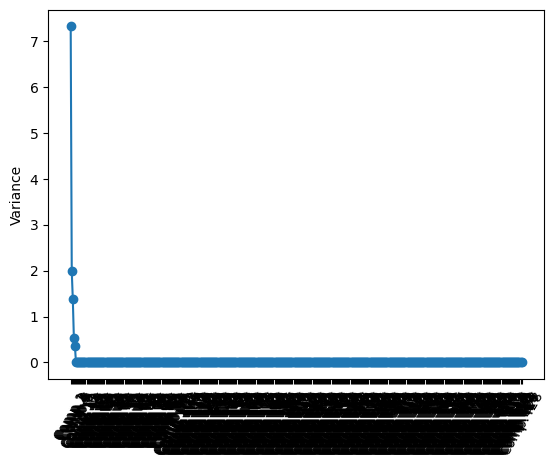

In [74]:
def screeplot(pca, standardised_values):
    y = np.std(pca.transform(standardised_values), axis=0)**2
    x = np.arange(len(y)) + 1
    plt.plot(x, y, "o-")
    plt.xticks(x, ["Comp."+str(i) for i in x], rotation=60)
    plt.ylabel("Variance")
    plt.show()

screeplot(pca, X)

## Keeping the PC's responsible for 90% of the data information.
One other alternative would be the kaiser criterion , but it would mostly keep the 75% of our info as shown here in the codeblock bellow


In [75]:
f = summary.sdev**2


f = f[f["Standard deviation"] > 1]

f

,Standard deviation
PC1,7.313902
PC2,1.981301
PC3,1.376539


Now let us keep the desired data

In [77]:
pcs_KEPT = summary.cumprop

pcs_KEPT = pcs_KEPT[pcs_KEPT['Cumulative Proportion'] < 0.99]

pcs_KEPT

,Cumulative Proportion
PC1,0.632788
PC2,0.804207
PC3,0.923303
PC4,0.969482


In [82]:
fin_data = pca.transform(X)[:, 0:4]

In [83]:
data_trans = pd.DataFrame(fin_data)

In [84]:
data_trans.columns = ["PC"+str(i) for i in range(1, len(data_trans.columns)+1)]

Our projected data after PCA

In [85]:
data_trans

,PC1,PC2,PC3,PC4
0,1.986785,-0.617549,-0.811379,0.416359
1,-0.638271,-2.349998,-0.548217,0.623526
2,2.450727,-0.659210,0.256527,-0.620551
3,1.671442,0.309485,0.047141,1.243623
4,-1.348278,-1.591025,2.061956,-0.080792
...,...,...,...,...
423,1.347738,-0.262652,1.037825,0.119967
424,0.436544,-0.427884,1.036213,-0.534537
425,-4.805053,3.035573,-0.520478,-1.297237
426,1.731889,-0.274221,-1.849380,-0.323803


In [86]:
data_trans = data_trans.set_index(un_val)
data_trans = data_trans.sort_index()

In [88]:
data_trans # We have fixed the index here

,PC1,PC2,PC3,PC4
1000286,3.272418,-1.433408,0.603244,-0.198529
1000353,1.168273,-0.013500,0.451539,-1.322931
1000412,-0.457465,-0.822671,-1.991822,1.109508
1000454,1.750760,-1.506592,-0.913928,0.211973
1000529,-0.435789,1.632790,0.913445,-0.986982
...,...,...,...,...
1099374,1.535087,-0.961445,-0.144432,2.091338
1099406,3.928040,0.105371,-0.214215,0.063351
1099452,0.828662,1.669824,-0.875941,0.388969
1099534,1.305968,1.732736,-1.724149,0.370031


The next 2 dataframes have just helping purpose

In [89]:
final_yahoo_df # Our index here is the spotify index

,artist_id,artist_name
280,1000286,abba
347,1000353,ace of base
401,1000412,yolanda adam
442,1000454,aerosmith
516,1000529,air suppli
...,...,...
96788,1099947,anni
96804,1099963,vybz kartel
96864,1100023,young buck
96979,1100138,yazoo


In [90]:
final_spot_df

,artist,song,link,text
0,abba,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \r\nA..."
1,abba,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \r\nTouch me gen..."
2,abba,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \r\nWhy I had...
3,abba,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,abba,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...
...,...,...,...,...
57645,ziggi marley,Good Old Days,/z/ziggy+marley/good+old+days_10198588.html,Irie days come on play \r\nLet the angels fly...
57646,ziggi marley,Hand To Mouth,/z/ziggy+marley/hand+to+mouth_20531167.html,Power to the workers \r\nMore power \r\nPowe...
57647,zwan,Come With Me,/z/zwan/come+with+me_20148981.html,all you need \r\nis something i'll believe \...
57648,zwan,Desire,/z/zwan/desire_20148986.html,northern star \r\nam i frightened \r\nwhere ...


### Selecting our final dataframe

In [92]:
final_data = data_trans.copy()
final_data

,PC1,PC2,PC3,PC4
1000286,3.272418,-1.433408,0.603244,-0.198529
1000353,1.168273,-0.013500,0.451539,-1.322931
1000412,-0.457465,-0.822671,-1.991822,1.109508
1000454,1.750760,-1.506592,-0.913928,0.211973
1000529,-0.435789,1.632790,0.913445,-0.986982
...,...,...,...,...
1099374,1.535087,-0.961445,-0.144432,2.091338
1099406,3.928040,0.105371,-0.214215,0.063351
1099452,0.828662,1.669824,-0.875941,0.388969
1099534,1.305968,1.732736,-1.724149,0.370031


In [93]:
newest_yahoo = pd.DataFrame()

newest_yahoo = final_yahoo_df.loc[final_yahoo_df['artist_id'].isin(data_trans.index)]

newest_yahoo = newest_yahoo.set_index('artist_id')
newest_yahoo

,artist_name
artist_id,
1000286,abba
1000353,ace of base
1000412,yolanda adam
1000454,aerosmith
1000529,air suppli
...,...
1099374,mark ronson
1099406,fall out boy
1099452,you am i


Now that our Dataframe has the computed-exoected values for every user artist we can keep its mean as a solution for selecting the final songs basd on our word2vec or tf-idf model

In [94]:
helper = pd.DataFrame()
mean_final = final_data.copy()
helper['mean_rating'] = mean_final.mean(axis = 1)
mean_final = helper
mean_final

,mean_rating
1000286,0.560931
1000353,0.070845
1000412,-0.540613
1000454,-0.114447
1000529,0.280866
...,...
1099374,0.630137
1099406,0.970637
1099452,0.502879
1099534,0.421147


Now , we have our finalized array , we each artists mean_rating

In [96]:
artist_mean = mean_final.copy()
artist_mean['artist_name'] = newest_yahoo['artist_name']
artist_mean

,mean_rating,artist_name
1000286,0.560931,abba
1000353,0.070845,ace of base
1000412,-0.540613,yolanda adam
1000454,-0.114447,aerosmith
1000529,0.280866,air suppli
...,...,...
1099374,0.630137,mark ronson
1099406,0.970637,fall out boy
1099452,0.502879,you am i
1099534,0.421147,kany west


# Performing word2vec and choosing songs
The choosing is done with the help of 2 books : Dostoyefski's the Idiot and Joyce's Ulysses ( only to spice up more our recommendations) , in order to recommend and find songs resembling one of the two books

## Building our corpus-corpi

In [97]:
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
import re
import PyPDF2

In [98]:
def df_dostoyefski():  # keeping the book as dataframe
    pag_files = []
    fin = pd.DataFrame
    
    path = open('corpi/idiot.pdf' , 'rb')  # Read the path , that our pdf has been saved
    
    pdf = PyPDF2.PdfReader(path)
    
    for i in range (2, len(pdf.pages)): # Here our text starts after the second page
        pag_obj = pdf.pages[i]
        txt = pag_obj.extract_text()
        txt = txt[22:]  # Based on the book format , we want to keep the text after the 22 character (header and etc)
                        # in order to remove unwanted sentences (headers , title , etc)
        txt = [x for x in txt if not (x.isdigit() or x[0] == '-' and x[1:].isdigit())] # to remove numbers
        pag_files.append(txt)
        
    label = np.ones((len(pag_files) ,1))    
    fin = pd.DataFrame({'page': pag_files})             
    fin['book_id'] = label    
        
    return(fin)

In [99]:
def df_joyce():
    pag_files = []
    fin = pd.DataFrame
    
    path = open('corpi/Ulysses.pdf' , 'rb')  # Read the path , that our pdf has been saved
    
    pdf = PyPDF2.PdfReader(path)
    
    for i in range (1, len(pdf.pages)):
        pag_obj = pdf.pages[i]
        txt = pag_obj.extract_text()
        txt = txt[19:]
        txt = [x for x in txt if not (x.isdigit() or x[0] == '-' and x[1:].isdigit())]
        pag_files.append(txt)
        
    
    label = np.zeros((len(pag_files) ,1))
    
    fin = pd.DataFrame({'page': pag_files})
    fin['book_id'] = label
        
        
    return(fin)

In [100]:
# Function for removing ASCII characters
def _removeNonAscii(s):
    return "".join(i for i in s if  ord(i)<128)

# Function for converting to lower case
def make_lower_case(text):
    return text.lower()

# Function for removing stop words
def remove_stop_words(text):
    text = text.split()
    stops = set(stopwords.words("english"))
    text = [w for w in text if not w in stops]
    text = " ".join(text)
    return text

# Function for removing html
def remove_html(text):
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', text)

# Function for removing punctuation
def remove_punctuation(text):
    tokenizer = RegexpTokenizer(r'\w+')
    text = tokenizer.tokenize(text)
    text = " ".join(text)
    return text

In [101]:
df_Idiot = df_dostoyefski()

df_Idiot['Cleaned'] = df_Idiot['page'].apply(_removeNonAscii)
df_Idiot['Cleaned'] = df_Idiot.Cleaned.apply(func = make_lower_case)
df_Idiot['Cleaned'] = df_Idiot.Cleaned.apply(func = remove_stop_words)
df_Idiot['Cleaned'] = df_Idiot.Cleaned.apply(func = remove_punctuation)
df_Idiot['Cleaned'] = df_Idiot.Cleaned.apply(func = remove_html)
df_Idiot = df_Idiot.drop('page' , axis =1)


df_Ulysses = df_joyce()

df_Ulysses['Cleaned'] = df_Ulysses['page'].apply(_removeNonAscii)
df_Ulysses['Cleaned'] = df_Ulysses.Cleaned.apply(func = make_lower_case)
df_Ulysses['Cleaned'] = df_Ulysses.Cleaned.apply(func = remove_stop_words)
df_Ulysses['Cleaned'] = df_Ulysses.Cleaned.apply(func = remove_punctuation)
df_Ulysses['Cleaned'] = df_Ulysses.Cleaned.apply(func = remove_html)
df_Ulysses = df_Ulysses.drop('page' , axis =1)

In [102]:
df_song = final_spot_df.copy()
df_song = df_song.drop('link' ,axis =1)

df_song['Cleaned'] = df_song['text'].apply(_removeNonAscii)
df_song['Cleaned'] = df_song.Cleaned.apply(func = make_lower_case)
df_song['Cleaned'] = df_song.Cleaned.apply(func = remove_stop_words)
df_song['Cleaned'] = df_song.Cleaned.apply(func = remove_punctuation)
df_song['Cleaned'] = df_song.Cleaned.apply(func = remove_html)

Printing our Dataframes to better understand the data . Attention! In the books , every entry reffers to a book page , e.g.
df_Idiot.index = 1 , refers to the first page ( after cleaning) of the book . Column book_id = 1 for Dostoyevski , = 0 for Joyce , is simpy our label

In [103]:
df_Idiot.head(10) # the first 10 entries

,book_id,Cleaned
0,1.0,towards end november thaw nine oclock one morn...
1,1.0,chance set opposite one another third class ca...
2,1.0,wearer cloak young fellow also twenty six twen...
3,1.0,wheugh goodness black haired young fellow whis...
4,1.0,oh youre quite wrong particular instance said ...
5,1.0,appeared deed surmised young fellow hastened a...
6,1.0,her mr pavlicheff supported switzerland know t...
7,1.0,excuse me said red nosed man young fellow bund...
8,1.0,oh learned little know added prince though exc...
9,1.0,deigning much look other however true enough f...


In [104]:
df_Ulysses.head(10)

,book_id,Cleaned
0,0.0,stately plump buck mulligan came stairhead bea...
1,0.0,back barracks said sternly added preachers ton...
2,0.0,mirror parapet dipped brush bowl lathered chee...
3,0.0,raving night black panther stephen said guncas...
4,0.0,god said quietly isnt sea algy calls it great ...
5,0.0,lovely mummer murmured himself kinch loveliest...
6,0.0,mockery it sa id contentedly secondleg be god ...
7,0.0,stephen bent forward peered mirror held him cl...
8,0.0,cracked lookingglass servant tell oxy chap dow...
9,0.0,shouts open window startling evening quadrangl...


In [105]:
df_song

,artist,song,text,Cleaned
0,abba,Ahe's My Kind Of Girl,"Look at her face, it's a wonderful face \r\nA...",look face wonderful face means something speci...
1,abba,"Andante, Andante","Take it easy with me, please \r\nTouch me gen...",take easy me please touch gently like summer e...
2,abba,As Good As New,I'll never know why I had to go \r\nWhy I had...,i ll never know go put lousy rotten show boy t...
3,abba,Bang,Making somebody happy is a question of give an...,making somebody happy question give take learn...
4,abba,Bang-A-Boomerang,Making somebody happy is a question of give an...,making somebody happy question give take learn...
...,...,...,...,...
57645,ziggi marley,Good Old Days,Irie days come on play \r\nLet the angels fly...,irie days come play let angels fly let devils ...
57646,ziggi marley,Hand To Mouth,Power to the workers \r\nMore power \r\nPowe...,power workers power power workers need power p...
57647,zwan,Come With Me,all you need \r\nis something i'll believe \...,need something i ll believe flashlights hall c...
57648,zwan,Desire,northern star \r\nam i frightened \r\nwhere ...,northern star frightened go rest can t sleep i...


Taking a song sample (for easier computations and because of RAM limitations) . If you want to test the whole Dataset
 simply commend the line

In [106]:
df_song = df_song.sample(10000).reset_index(drop = True)

## Building our Corpus-Vocabulary for each Dataframe

In [107]:
corpus_dost = []
for words in df_Idiot['Cleaned']:
    corpus_dost.append(words.split())

In [108]:
corpus_joyce = []
for words in df_Ulysses['Cleaned']:
    corpus_joyce.append(words.split())

In [109]:
corpus_song = []
for words in df_song['Cleaned']:
    corpus_song.append(words.split())

## Inserting-Creating our word2vec models to create word embeddings

In [110]:
from gensim.models import Word2Vec, KeyedVectors

In [111]:
model_dost = Word2Vec(sentences=corpus_dost, vector_size=200, window=4, min_count=3, sg = 1)  # skipgram architecture

In [112]:
model_joyce = Word2Vec(sentences=corpus_joyce, vector_size=200, window=4, min_count=3, sg = 1)  # skipgram

In [113]:
song_model = Word2Vec(sentences=corpus_song, vector_size=200, window=4, min_count=3, sg = 1)  # skipgram

### Vectorizing our models , in order to create our embeddings

In [114]:
def vectors_dost():
    
    
    # Creating a list for storing the vectors ('Description' into vectors)
    #global word_embeddings
    word_embeddings = []

    # Reading the each 'Description'
    for line in df_Idiot['Cleaned']:
        avgword2vec = None
        count = 0
        for word in line.split():
            if word in model_dost.wv.key_to_index:
                count += 1
                if avgword2vec is None:
                    avgword2vec = model_dost.wv[word]
                else:
                    avgword2vec = avgword2vec + model_dost.wv[word]
                
        if avgword2vec is not None:
            avgword2vec = avgword2vec / count
            word_embeddings.append(avgword2vec)
            

    return(word_embeddings)



def vectors_joyce():
    
    
    # Creating a list for storing the vectors ('Description' into vectors)
    #global word_embeddings
    word_embeddings = []

    # Reading the each 'Description'
    for line in df_Ulysses['Cleaned']:
        avgword2vec = None
        count = 0
        for word in line.split():
            if word in model_joyce.wv.key_to_index:
                count += 1
                if avgword2vec is None:
                    avgword2vec = model_joyce.wv[word]
                else:
                    avgword2vec = avgword2vec + model_joyce.wv[word]
                
        if avgword2vec is not None:
            avgword2vec = avgword2vec / count
            word_embeddings.append(avgword2vec)
            

    return(word_embeddings)






def vectors_song():
    
    
    # Creating a list for storing the vectors ('Description' into vectors)
    #global word_embeddings
    word_embeddings = []

    # Reading the each 'Description'
    for line in df_song['Cleaned']:
        avgword2vec = None
        count = 0
        for word in line.split():
            if word in song_model.wv.key_to_index:
                count += 1
                if avgword2vec is None:
                    avgword2vec = song_model.wv[word]
                else:
                    avgword2vec = avgword2vec + song_model.wv[word]
                
        if avgword2vec is not None:
            avgword2vec = avgword2vec / count
            word_embeddings.append(avgword2vec)
            

    return(word_embeddings)


Our final Embeddings

In [115]:
embed_d = vectors_dost()
emded_j = vectors_joyce()
embed_s = vectors_song()

In [116]:
df_DOST = pd.DataFrame(embed_d)
df_JOYCE = pd.DataFrame(emded_j)
df_SONG = pd.DataFrame(embed_s)

In [117]:
label1 = np.zeros((df_Idiot.shape[0]))
label2 = np.ones((df_Ulysses.shape[0]))

labels = np.concatenate((label1,label2) , axis =0)


df_labels = pd.DataFrame(labels)

In [118]:
total_df = pd.concat([df_DOST , df_JOYCE ]).reset_index()
total_df = total_df.drop('index' , axis = 1)
total_df['label'] = df_labels

Now let us see our final - total_df . Attention! our labels have changed to Dostoyevski = 0 and Joyce = 1 (for easier understanding (programmers desire actually))

In [119]:
total_df

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,label
0,0.012388,0.044012,0.006825,0.100227,0.097466,-0.153133,-0.098859,0.245780,-0.041045,0.171692,...,-0.082567,-0.001930,-0.071521,0.064381,0.077070,0.066707,-0.087596,-0.093820,-0.096958,0.0
1,0.003041,0.040915,-0.001659,0.091601,0.092867,-0.153865,-0.093672,0.238093,-0.041952,0.171909,...,-0.082877,0.006875,-0.073818,0.073115,0.083947,0.062462,-0.089495,-0.097017,-0.091968,0.0
2,-0.005391,0.035357,-0.019809,0.084631,0.091241,-0.158677,-0.082856,0.245207,-0.045454,0.168948,...,-0.075847,0.008799,-0.074592,0.068679,0.092485,0.060198,-0.094918,-0.107078,-0.093091,0.0
3,-0.021045,0.029439,-0.042225,0.076462,0.091437,-0.165652,-0.069877,0.249095,-0.051155,0.171611,...,-0.069797,0.006275,-0.075339,0.070652,0.103152,0.059185,-0.106694,-0.117170,-0.094174,0.0
4,-0.024707,0.025138,-0.055851,0.074301,0.095107,-0.170521,-0.062636,0.261094,-0.057527,0.172894,...,-0.063463,0.005865,-0.074068,0.070606,0.106631,0.060946,-0.106257,-0.132717,-0.106333,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2446,-0.028345,-0.070451,0.113387,0.117467,0.129455,-0.062822,-0.152763,0.164518,-0.085643,0.099612,...,-0.064602,0.021986,-0.173540,0.145449,0.119932,0.059684,-0.143599,-0.006636,-0.065216,1.0
2447,-0.006270,-0.061685,0.114238,0.115940,0.104636,-0.053714,-0.160980,0.164546,-0.098002,0.096476,...,-0.064559,0.033790,-0.137877,0.140463,0.104549,0.055748,-0.111774,-0.010407,-0.074940,1.0
2448,-0.023091,-0.062680,0.112963,0.120059,0.110534,-0.068193,-0.155647,0.161835,-0.102692,0.092959,...,-0.063281,0.032459,-0.162804,0.155458,0.110658,0.053974,-0.128377,0.004791,-0.066201,1.0
2449,-0.003504,-0.056536,0.115783,0.117268,0.101185,-0.056247,-0.157797,0.168543,-0.103408,0.094309,...,-0.064282,0.038201,-0.131306,0.146080,0.103171,0.053455,-0.103134,-0.008577,-0.072538,1.0


# Song classification , using a Linear SVM model

In [120]:
from sklearn import svm
from sklearn.preprocessing import StandardScaler

In [121]:
lin_svm_mod = svm.SVC(kernel="linear" , gamma = "auto" , C = 100)  # C= penalty , for wrongly recognised labels

In [122]:
shuffled =total_df.copy()
shuffled = shuffled.sample(frac = 1) # Shuffling our Dataframe to make it more "Random"
shuffled

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,label
1071,-0.034347,0.059875,-0.041156,0.068293,0.095786,-0.173134,-0.072985,0.246699,-0.066602,0.196584,...,-0.077080,0.014559,-0.077854,0.092525,0.115292,0.081396,-0.099501,-0.112215,-0.122636,0.0
86,-0.010108,0.053659,-0.010627,0.096645,0.097751,-0.158669,-0.093896,0.251265,-0.057144,0.183075,...,-0.086319,0.002217,-0.066683,0.086810,0.099203,0.071105,-0.094061,-0.118828,-0.117522,0.0
2083,-0.005484,-0.053970,0.119964,0.124194,0.091467,-0.067098,-0.160451,0.162867,-0.116352,0.092672,...,-0.064051,0.041514,-0.135653,0.163849,0.100338,0.045912,-0.096655,0.003037,-0.072331,1.0
803,-0.046481,0.007782,-0.084351,0.067441,0.102982,-0.183906,-0.032235,0.282446,-0.056889,0.160605,...,-0.051521,-0.006550,-0.065993,0.055170,0.112838,0.047452,-0.106100,-0.138259,-0.107465,0.0
697,-0.019720,0.066410,-0.026346,0.084759,0.097187,-0.174977,-0.084542,0.249571,-0.069067,0.202855,...,-0.077650,0.018961,-0.081469,0.096956,0.101205,0.093870,-0.106890,-0.109907,-0.128562,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2073,-0.000520,-0.054309,0.102877,0.118852,0.086467,-0.061695,-0.155768,0.160451,-0.111680,0.091382,...,-0.057445,0.042531,-0.126009,0.158202,0.098324,0.047191,-0.085906,-0.002902,-0.071153,1.0
704,-0.039832,0.028126,-0.064862,0.075006,0.101887,-0.180218,-0.059522,0.267545,-0.063667,0.183753,...,-0.060149,0.010153,-0.069632,0.072931,0.114285,0.071607,-0.112019,-0.130045,-0.122396,0.0
1370,0.000664,-0.050476,0.115995,0.124922,0.079019,-0.060983,-0.157403,0.160435,-0.121101,0.085476,...,-0.060990,0.042616,-0.129642,0.161214,0.092886,0.048145,-0.083818,0.003743,-0.069406,1.0
2198,-0.007993,-0.054312,0.116097,0.125990,0.096534,-0.061499,-0.154927,0.157067,-0.112313,0.093493,...,-0.056911,0.044064,-0.131895,0.162607,0.098970,0.045811,-0.090105,0.004107,-0.066892,1.0


In [123]:
X = shuffled.copy()
X = X.drop('label' , axis = 1) # OUR FEATURES

y =shuffled.copy()
y = y['label']  # our labels

In [124]:
X.head(10)

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
1071,-0.034347,0.059875,-0.041156,0.068293,0.095786,-0.173134,-0.072985,0.246699,-0.066602,0.196584,...,0.119254,-0.077080,0.014559,-0.077854,0.092525,0.115292,0.081396,-0.099501,-0.112215,-0.122636
86,-0.010108,0.053659,-0.010627,0.096645,0.097751,-0.158669,-0.093896,0.251265,-0.057144,0.183075,...,0.111681,-0.086319,0.002217,-0.066683,0.086810,0.099203,0.071105,-0.094061,-0.118828,-0.117522
2083,-0.005484,-0.053970,0.119964,0.124194,0.091467,-0.067098,-0.160451,0.162867,-0.116352,0.092672,...,0.151125,-0.064051,0.041514,-0.135653,0.163849,0.100338,0.045912,-0.096655,0.003037,-0.072331
803,-0.046481,0.007782,-0.084351,0.067441,0.102982,-0.183906,-0.032235,0.282446,-0.056889,0.160605,...,0.119478,-0.051521,-0.006550,-0.065993,0.055170,0.112838,0.047452,-0.106100,-0.138259,-0.107465
697,-0.019720,0.066410,-0.026346,0.084759,0.097187,-0.174977,-0.084542,0.249571,-0.069067,0.202855,...,0.120823,-0.077650,0.018961,-0.081469,0.096956,0.101205,0.093870,-0.106890,-0.109907,-0.128562
958,-0.051846,0.056240,-0.047680,0.076680,0.103575,-0.185784,-0.059670,0.268241,-0.070400,0.172835,...,0.137883,-0.073384,0.000242,-0.074284,0.083482,0.125664,0.061095,-0.095019,-0.132652,-0.128986
26,-0.050992,0.002618,-0.104503,0.062674,0.105358,-0.188126,-0.028623,0.283981,-0.067681,0.175372,...,0.120951,-0.043242,-0.002724,-0.074588,0.055852,0.129126,0.058797,-0.122872,-0.151384,-0.115960
1506,0.000771,-0.052214,0.110656,0.121227,0.077298,-0.056374,-0.153398,0.155113,-0.119571,0.083028,...,0.139024,-0.060267,0.038298,-0.125142,0.157203,0.091101,0.050765,-0.086556,0.002549,-0.071776
738,-0.015456,0.034510,-0.036223,0.081649,0.095002,-0.168160,-0.075866,0.256594,-0.052140,0.176302,...,0.105047,-0.070566,0.008104,-0.077632,0.072058,0.100639,0.065463,-0.103118,-0.115161,-0.101171
870,0.002132,0.042207,-0.019499,0.084010,0.100224,-0.166809,-0.086774,0.256724,-0.055181,0.194565,...,0.108094,-0.073112,0.006368,-0.079031,0.070492,0.097587,0.082513,-0.100031,-0.112540,-0.120927


In [125]:
y.head(10)

1071    0.0
86      0.0
2083    1.0
803     0.0
697     0.0
958     0.0
26      0.0
1506    1.0
738     0.0
870     0.0
Name: label, dtype: float64

In [126]:
scaler = StandardScaler()
scaler.fit(X)
scaled_data = scaler.transform(X)

In [127]:
lin_svm_mod.fit(X,y)

SVC(C=100, gamma='auto', kernel='linear')

## Now let us test our classifier

In [128]:
from sklearn.model_selection import train_test_split

In [129]:
xx_train, xx_test, yy_train, yy_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [130]:
lin_svm_mod_tester = svm.SVC(kernel="linear" , gamma = "auto" , C = 100)  # C= penalty , for wrongly recognised labels

In [131]:
# Let us see the classification without standardising our data

In [132]:
lin_svm_mod_tester.fit(xx_train,yy_train)

SVC(C=100, gamma='auto', kernel='linear')

In [133]:
tester_prediction = lin_svm_mod_tester.predict(xx_test)

In [134]:
from sklearn.metrics import classification_report

In [135]:
print(classification_report(yy_test , tester_prediction))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       370
         1.0       1.00      1.00      1.00       439

    accuracy                           1.00       809
   macro avg       1.00      1.00      1.00       809
weighted avg       1.00      1.00      1.00       809



From our testing we see that our SVM can perfectly classify correctly the book vectors , so its appropriate to use it on the whole dataset , and predicted the "Song Classes"

In [136]:
predicted = lin_svm_mod.predict(X)

In [137]:
print(classification_report(y , predicted))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1147
         1.0       1.00      1.00      1.00      1304

    accuracy                           1.00      2451
   macro avg       1.00      1.00      1.00      2451
weighted avg       1.00      1.00      1.00      2451



Let ussee our support vectors

In [138]:
lin_svm_mod.support_  # our support vectors

array([ 625, 1211, 1633])

### Song Predictions

In [139]:
song_predictions = lin_svm_mod.predict(df_SONG)

In [140]:
print(song_predictions[:16]) # letssee how it classified the first 16 songs

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [141]:
dost_songs = song_predictions[song_predictions == 0]
joyce_songs = song_predictions[song_predictions == 1]


print("Songs resembling Dostoyefski: " ,len(dost_songs))
print("Songs resembling Joyce: " ,len(joyce_songs))


# CHeck out , how our classifier has done for the songs

Songs resembling Dostoyefski:  8993
Songs resembling Joyce:  1007


# Cosine Similarity and song classifiaction

In [142]:
from sklearn.metrics.pairwise import cosine_similarity

In [143]:
def final_recommender(song):
    copycat = df_song.copy()
    
    copycat['Class'] = song_predictions
    copycat = copycat.drop(['text'] , axis = 1)
    
    song_class = copycat.loc[copycat['song'] == song]


    if song_class['Class'].any() == 0:
        print("The current song resembles Dostoyevski")
        
        df_class_dost = copycat.loc[copycat['Class'] == 0]
        
        df_class = df_SONG.loc[df_SONG.index.isin(df_class_dost.index)]
        
        copycat = df_class_dost.reset_index(drop = True)
        
    else :
        print("The current song resembles Joyce")
        
        df_class_joyce = copycat.loc[copycat['Class'] == 1]
        
        df_class = df_SONG.loc[df_SONG.index.isin(df_class_joyce.index)]
        
        copycat = df_class_joyce.reset_index(drop = True)
    
    
    cosine_similarities = cosine_similarity(df_class, df_class)

    # Taking the Song , Artist name and the song "class" and storing it in new dataframe
    tracks = copycat[['song', 'artist','Class']]

    # Reverse mapping of the index
    indices = copycat[copycat['song'] == song].index[0]
         
 
    sim_scores = list(enumerate(cosine_similarities[indices]))
    sim_scores = sorted(sim_scores, key = lambda x: x[1], reverse = True)
    #sim_scores = sim_scores[1:21]
    sim_scores = sim_scores[1:21]
    song_indices = [i[0] for i in sim_scores]
    recommend = tracks.iloc[song_indices]
    
    
    print("Our top 20 recommendations are:")
    
    
    
    
    return(pd.DataFrame(recommend))

In [144]:
# Lets check out some of our songs

df_song.tail()

,artist,song,text,Cleaned
9995,yello,The Rhythm Divine,You know that my tears \r\nHave kept me awake...,know tears kept awake longer gone i ll hunger ...
9996,poison,Let It Play,Did you ever get up on the wrong side of bed ...,ever get wrong side bed achin head fall apart ...
9997,nitti gritti dirt band,Partners Brothers And Friends,The promoter says he wants to cancel \r\nCaus...,promoter says wants cancel cause ain t enough ...
9998,inx,Simple Simon,"Simon found love, in love he thinks he found h...",simon found love love thinks found heart alone...
9999,linda ronstadt,Anyone Who Had A Heart,Anyone who ever loved could look at me \r\nAn...,anyone ever loved could look know love amyone ...


In [146]:
final_recommender("The Rhythm Divine")

The current song resembles Dostoyevski
Our top 20 recommendations are:


,song,artist,Class
1702,Rhythm Divine,enriqu iglesia,0.0
6795,Hand On Heart,queensrych,0.0
3195,Ghost,indigo girl,0.0
3533,Looking At You,dave matthew band,0.0
6370,Lover Of My Soul,ami grant,0.0
1918,Coins In A Fountain,passeng,0.0
4071,In A Heart Like Mine,randi travi,0.0
8472,Somewhere Somehow,ami grant,0.0
3236,The Real Thing,faith no more,0.0
3537,Slow Jams,quinci jone,0.0


In [147]:
def recommend_data_based(song):
    print("Our Reccomendations , database filtered :")
    
    recc = final_recommender(song)
    
    big_array = pd.merge(left=recc, right=artist_mean, how='left', left_on=['artist'],right_on = ['artist_name'])
    
    big_array = big_array.drop(['artist_name'] , axis =1)
    
    big_array = big_array.sort_values(by=['mean_rating'] , ascending = False)

    
    return(big_array)

In [148]:
recommend_data_based("The Rhythm Divine")

Our Reccomendations , database filtered :
The current song resembles Dostoyevski
Our top 20 recommendations are:


,song,artist,Class,mean_rating
13,The Rose,leann rime,0.0,1.082101
6,In A Heart Like Mine,randi travi,0.0,0.937472
12,Carnival,tori amo,0.0,0.818827
9,Slow Jams,quinci jone,0.0,0.778630
16,How Do I Love Thee,queen latifah,0.0,0.774579
11,The Way That You Love,vanessa william,0.0,0.692806
2,Ghost,indigo girl,0.0,0.628051
8,The Real Thing,faith no more,0.0,0.433771
0,Rhythm Divine,enriqu iglesia,0.0,0.286388
3,Looking At You,dave matthew band,0.0,0.249366


In [149]:
def recommend_song_via_the_other_book(song):
    
    copycat = df_song.copy()
    
    copycat['Class'] = song_predictions
        
    copycat = copycat.drop(['text'] , axis = 1)
    
    song_class = copycat.loc[copycat['song'] == song]
    
    if song_class['Class'].any() != 0:

        print("So you chose Dostoyevski recommendations")
        
        df_class_dost = copycat.loc[copycat['Class'] == 0]
        

        df_class_dost= pd.concat([df_class_dost, copycat[copycat['song'] == song]], ignore_index=True) # Add song to dataframe
        
        df_class = df_SONG.loc[df_SONG.index.isin(df_class_dost.index)]
        
        copycat = df_class_dost.reset_index(drop = True)
        
    else :
        print("So you chose Joyce recommendations")
        
        df_class_joyce = copycat.loc[copycat['Class'] == 1]
        
       
        df_class_joyce = pd.concat([df_class_joyce, copycat[copycat['song'] == song]], ignore_index=True)
        
        df_class = df_SONG.loc[df_SONG.index.isin(df_class_joyce.index)]
        
        copycat = df_class_joyce.reset_index(drop = True)
    
    cosine_similarities = cosine_similarity(df_class, df_class)
    
    
    
    # Taking the Song , Artist name and storing it in new dataframe
    tracks = copycat[['song', 'Class']]

    # Reverse mapping of the index
    indices = copycat[copycat['song'] == song].index[0]
         
 
    sim_scores = list(enumerate(cosine_similarities[indices]))
    sim_scores = sorted(sim_scores, key = lambda x: x[1], reverse = True)
    sim_scores = sim_scores[1:21]
    song_indices = [i[0] for i in sim_scores]
    recommend = tracks.iloc[song_indices]
    
    
    print("Our Song recommendations based on the other Book:")
    
        
    return(pd.DataFrame(recommend))

In [150]:
recommend_song_via_the_other_book("The Rhythm Divine")

So you chose Joyce recommendations
Our Song recommendations based on the other Book:


,song,Class
703,Love Hurts,1.0
270,Hand On My Heart,1.0
606,Downside-Up,1.0
61,Fool About You,1.0
471,Just To Satisfy You,1.0
886,Sleeping Bag,1.0
190,Anywhere You Run To,1.0
904,Heart Without A Home,1.0
305,Looking For A Stranger,1.0
35,Leave Me To Bleed,1.0


In [152]:
recommend_song_via_the_other_book("Leave Me To Bleed")

So you chose Dostoyevski recommendations
Our Song recommendations based on the other Book:


,song,Class
1066,I Can't Live Without My Radio,0.0
471,Walking In My Shoes,0.0
3350,The Walk,0.0
211,Sitamoia,0.0
2694,I Remember The Boy,0.0
5568,Angel From The Coast,0.0
1698,How Many Say I,0.0
5859,No Surprises Please,0.0
4652,Tell Me What You Want,0.0
7612,Catacomb,0.0
